In [1]:
#Import

import numpy as np
from skimage import io,color
from skimage.transform.integral import integral_image
import os
import matplotlib.pyplot as plt

In [2]:
#################################
########  Lab 3 - HAAR  #########
##########  H_3V, H_L  ##########
#################################
def suma_dreptunghi(l,c,h,w,img_integral):
    
    # PARAMETRII : perechea (l,c) pentru pixelul curent,dimensiunea imaginii,imaginea integrala
    # RETURN : Z=suma intensitatilor pixelilor din dreptunghiul ales
    if l>0 and c>0:
        A = img_integral[l-1, c-1]
        B = img_integral[l-1, w+c-1]
        C = img_integral[h+l-1, c-1]     
    elif l==0 and c>0:
        A=B=0
        C = img_integral[h-1, c-1]  
    elif l>0 and c==0:
        A=C=0
        B = img_integral[l-1, w-1] 
    else:
        A=B=C=0

    D = img_integral[h+l-1, w+c-1]
    
    Z = A+D-B-C
    
    return Z

def img_integrala(img,h,w,flag):
    
    img_integral = np.zeros((h,w))
    
    # PARAMETRII : imaginea,dimensiunea acesteia si un flag(1 sau 2 tip intreg) care sa 
    # semnaleze ce varianta folositi(1 sau 2)-> ambele variante treb sa duca 
    # acelasi rezultat
    # RETURN: imaginea integrala finala
    
    #VARIANTA 1(varianta clasica cu FOR)
    #HINT-1 -> puteti sa folositi .sum() din numpy adaptand mereu o fereastra
    # care pleaca din coltul dreapta-sus(0,0) si cuprinde pixelul crent
    #HINT-2 -> puteti sa gasiti o regula astfel incat sa folositi valorile calculate
    # anterior in imaginea integrala si imaginea curenta
    if(flag ==1):
        
        for i in range(h):
            for j in range(w):
                    img_integral[i,j] = np.sum(img[0:i+1,0:j+1]) 
    

    #VARIANTA 2(folosind functii din python)
    # uitati-va ce face np.cumsum() si folositi-l corespunzator

    if(flag == 2):
        img_integral = np.cumsum(img, axis=0)
        img_integral = np.cumsum(img_integral, axis=1)
        
    if(flag ==3):
        for i in range(h):
            for j in range(w):
                if(i==j==0):
                    img_integral[i,j] = img[i,j]
                elif(i==0 and j!=0):
                    img_integral[i,j] = img[i,j] + img_integral[i,j-1]
                elif(i!=0 and j==0):
                    img_integral[i,j] = img[i,j] + img_integral[i-1,j]    
                elif(i!=0 and j!=0):
                    img_integral[i,j] = img[i,j] + img_integral[i,j-1] + img_integral[i-1,j] - img_integral[i-1,j-1]
    
    return img_integral

In [7]:
def H_3V(l,c,h,w,img_integ):
     za1=suma_dreptunghi(l,c,h//3,w,img_integ)
     zn1=suma_dreptunghi(l+h//3,c,h//3,w,img_integ)
     za2=suma_dreptunghi(l+2*(h//3),c,h//3,w,img_integ)
     haar=za1+za2-zn1
     
     return zn1,za1,za2,haar
    

def H_L(l,c,h,w,img_integ):
     zn1=suma_dreptunghi(l,c,h,w//3,img_integ)
     za2=suma_dreptunghi(l,c-w//3,h,w//3,img_integ)
     za1=suma_dreptunghi(l,c+w//3,h,w//3,img_integ)
     zn2=suma_dreptunghi(l+h,c+w//3,h,w//3,img_integ)
     haar=za1+za2-zn1-zn2
     
     return zn1,zn2,za1,za2,haar

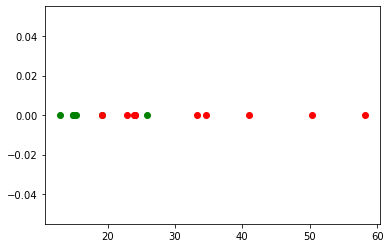

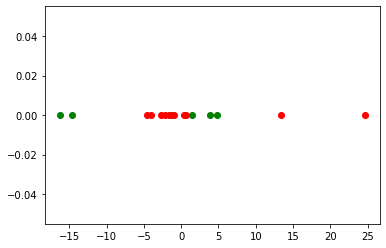

In [24]:
path = "D:\MASTER TAID\sem 3\IVOM\lab\Laboratoare\COLOCVIU_IVOM_TAID_PRIMA_SERIE_DEC_2019\Mici"
poze= os.listdir(path)

lista_haar_3V=[]
lista_haar_L=[]

for poza in poze:
    #citeste imagine si transforma in gray
    im=io.imread("COLOCVIU_IVOM_TAID_PRIMA_SERIE_DEC_2019\Mici/"+ poza)
    im = color.rgb2gray(im)
    
    #calculeaza imaginea integrala pt fiecare poza
    ii=img_integrala(im,im.shape[0],im.shape[1],2)
    
    #calculeaza 2 variuante de trasaturi haar 
    zn1,za1,za2,haar3V=H_3V(0, 16, 24, 8,ii)
    zn_1,zn_2,za_1,za_2,haarL=H_L(0, 8, 8, 24,ii)
    
    #adauga in lista valoarea trasaturii pt fiec poza
    lista_haar_3V.append(haar3V)
    lista_haar_L.append(haarL)
    
lista_haar_3V = np.asarray(lista_haar_3V)
lista_haar_L = np.asarray(lista_haar_L)

# creeaza a doua axa pentru figura
y1 = np.zeros(6)
y2 = np.zeros(10)

#ploteaza intr-o figura valorile haar pt fete cu verde si non-fete cu rosu
plt.figure(1) 
plt.scatter(lista_haar_3V[:6],y1, color='g')
plt.scatter(lista_haar_3V[6:],y2, color='r')

plt.figure(2) 
plt.scatter(lista_haar_L[:6],y1, color='g')
plt.scatter(lista_haar_L[6:],y2, color='r')

In [15]:
T_3V= 18
lista_haar_3V[lista_haar_3V <= T_3V] = 1
lista_haar_3V[lista_haar_3V != 1] = 0
print(lista_haar_3V)

#functie pentru caluclul performnatei tp,tn,fp,fn
def performanta(etichete_referinta, trasaturi_haar, nr_poze):
    
    #Parameters : etichete_referinta, trasaturi_haar, nr_poze
    tp=np.logical_and(etichete_referinta==1, trasaturi_haar==1).sum()/6
    fp=np.logical_and(etichete_referinta==0, trasaturi_haar==1).sum()/10
    fn=1 - tp
    tn=1 - fp
    
    print("tp=",tp," fn=",fn," tn=",tn," fp=",fp)

referinta = np.array([1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0])
print(referinta)
#apelati fct de performanta 
performanta(referinta, lista_haar_3V, 16)

[0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
tp= 0.6666666666666666  fn= 0.33333333333333337  tn= 1.0  fp= 0.0


In [25]:
T_L= 1
lista_haar_L[lista_haar_L >= T_L] = 1
lista_haar_L[lista_haar_L != 1] = 0
print(lista_haar_L)
performanta(referinta, lista_haar_L, 16)

[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
tp= 0.5  fn= 0.5  tn= 0.8  fp= 0.2
